In [100]:
%matplotlib inline
import pandas as pd
import numpy as np
from time import time
import xgboost
from matplotlib import pyplot as plt
import graphviz

from sklearn.preprocessing import RobustScaler, Imputer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
from datetime import datetime, time

In [101]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ids = test['Id']
len(test)

1459

In [102]:
train = train.dropna(axis=1, thresh=1168)
test = test.dropna(axis=1, thresh=1168)
len(test)

1459

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

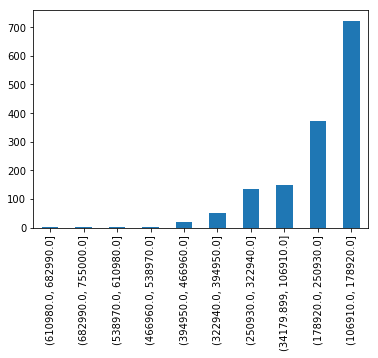

In [104]:
fig, ax = plt.subplots()
train['SalePrice'].value_counts(bins=10, ascending=True).plot(ax=ax, kind='bar')

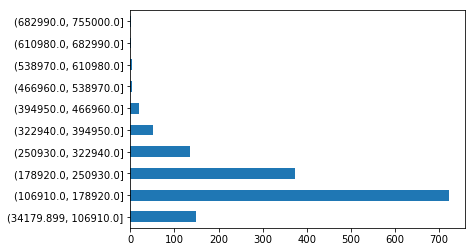

In [105]:
fig, ax = plt.subplots()
train['SalePrice'].value_counts(bins=10, ascending=True).sort_index().plot(kind='barh')

In [106]:
y = train['SalePrice'].value_counts(bins=10, ascending=True)
y

(610980.0, 682990.0]       2
(682990.0, 755000.0]       2
(538970.0, 610980.0]       3
(466960.0, 538970.0]       4
(394950.0, 466960.0]      19
(322940.0, 394950.0]      51
(250930.0, 322940.0]     135
(34179.899, 106910.0]    148
(178920.0, 250930.0]     373
(106910.0, 178920.0]     723
Name: SalePrice, dtype: int64

In [107]:
df_obj = train.select_dtypes(include=[np.object])
df_obj2 = test.select_dtypes(include=[np.object])
len(test)

1459

In [108]:
list(df_obj)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [109]:
df_obj_dums = pd.get_dummies(df_obj, drop_first=True)
df_obj_dums2 = pd.get_dummies(df_obj2, drop_first=True)
len(test)

1459

In [110]:
train.shape

(1460, 76)

In [111]:
drops = ['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']
len(test)

1459

In [112]:
train = train.drop(drops, axis=1)
test = test.drop(drops, axis=1)
df_obj = df_obj.drop(drops, axis=1)

In [113]:
df_obj2 = df_obj2.drop(drops, axis=1)

In [114]:
good = [train, df_obj]

In [115]:
train = pd.concat([train, df_obj], axis=1)
test = pd.concat([test, df_obj2], axis=1)
len(test)

1459

In [116]:
train = train.drop(['Id'], axis=1)
test = test.drop(['Id'], axis=1)

In [117]:
import xgboost as xgb

In [201]:
X_train = train[[c for c in train if 'SalePrice' not in c]]
y_train = train['SalePrice']
y_test = test[[c for c in test if 'SalePrice' not in c]]


dtrain = xgb.DMatrix(X_train, label=y_train, weight=weights)
dtest = xgb.DMatrix(test)

In [249]:
params =  {'learning_rate':0.01,
 'max_depth':6,
 'lambda':0.5,
 'objective':'reg:linear',
 'nthread':4,
 'scale_pos_weight':1,
 'eval_metric':'rmse',         
 'seed':27,
 'silent':1}


evallist  = [(dtrain,'train')]

In [251]:
num_round = 1000
model = xgb.train(params, dtrain, evals=evallist, num_boost_round=5000, early_stopping_rounds=50)

[0]	train-rmse:178573
Will train until train-rmse hasn't improved in 50 rounds.
[1]	train-rmse:161468
[2]	train-rmse:146065
[3]	train-rmse:132211
[4]	train-rmse:119669
[5]	train-rmse:108438
[6]	train-rmse:98293.7
[7]	train-rmse:89133.9
[8]	train-rmse:80890.6
[9]	train-rmse:73452.6
[10]	train-rmse:66766.3
[11]	train-rmse:60754.6
[12]	train-rmse:55323.7
[13]	train-rmse:50435.7
[14]	train-rmse:46024.9
[15]	train-rmse:42070.4
[16]	train-rmse:38535.6
[17]	train-rmse:35314.2
[18]	train-rmse:32445.9
[19]	train-rmse:29892.9
[20]	train-rmse:27573.6
[21]	train-rmse:25535
[22]	train-rmse:23674.2
[23]	train-rmse:22052.8
[24]	train-rmse:20547.4
[25]	train-rmse:19206.6
[26]	train-rmse:18039
[27]	train-rmse:16995.9
[28]	train-rmse:16057.9
[29]	train-rmse:15237.5
[30]	train-rmse:14497.1
[31]	train-rmse:13808.6
[32]	train-rmse:13180.4
[33]	train-rmse:12616.5
[34]	train-rmse:12151.9
[35]	train-rmse:11720.8
[36]	train-rmse:11361.1
[37]	train-rmse:11026.6
[38]	train-rmse:10762.1
[39]	train-rmse:10489.7
[4

In [219]:
print ('running cross validation, with preprocessing function')
# define the preprocessing function
# used to return the preprocessed training, test data, and parameter
# we can use this to do weight rescale, etc.
# as a example, we try to set scale_pos_weight
def fpreproc(dtrain, dtest, params):
    label = dtrain.get_label()
    ratio = float(np.sum(label == 0)) / np.sum(label==1)
    param['scale_pos_weight'] = ratio
    wtrain = dtrain.get_weight()
    wtest = dtest.get_weight()
    sum_weight = sum(wtrain) + sum(wtest)
    wtrain *= sum_weight / sum(wtrain)
    wtest *= sum_weight / sum(wtest)
    dtrain.set_weight(wtrain)
    dtest.set_weight(wtest)
    return (dtrain, dtest, params)

# do cross validation, for each fold
# the dtrain, dtest, param will be passed into fpreproc
# then the return value of fpreproc will be used to generate
# results of that fold
xgb.cv(params, dtrain, num_round, nfold=5,
       metrics={'rmse'}, seed = 0, fpreproc = fpreproc)

running cross validation, with preprocessing function


/home/brennan/anaconda3/envs/analytics/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


NameError: name 'param' is not defined

In [252]:
model.get_score()

{'1stFlrSF': 3257,
 '2ndFlrSF': 1755,
 '3SsnPorch': 148,
 'BedroomAbvGr': 535,
 'BsmtFinSF1': 3460,
 'BsmtFinSF2': 596,
 'BsmtFullBath': 325,
 'BsmtHalfBath': 163,
 'BsmtUnfSF': 4899,
 'EnclosedPorch': 467,
 'Fireplaces': 482,
 'FullBath': 231,
 'GarageArea': 3420,
 'GarageCars': 227,
 'GarageYrBlt': 2260,
 'GrLivArea': 3961,
 'HalfBath': 209,
 'KitchenAbvGr': 93,
 'LotArea': 7286,
 'LotFrontage': 9443,
 'LowQualFinSF': 130,
 'MSSubClass': 5773,
 'MasVnrArea': 2477,
 'MiscVal': 200,
 'MoSold': 2474,
 'OpenPorchSF': 2030,
 'OverallCond': 1168,
 'OverallQual': 1734,
 'PoolArea': 45,
 'ScreenPorch': 424,
 'TotRmsAbvGrd': 976,
 'TotalBsmtSF': 2991,
 'WoodDeckSF': 1845,
 'YearBuilt': 3164,
 'YearRemodAdd': 2281,
 'YrSold': 1516}

In [253]:
ypred = model.predict(dtest,ntree_limit=model.best_ntree_limit)

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f5564c2ff60>>

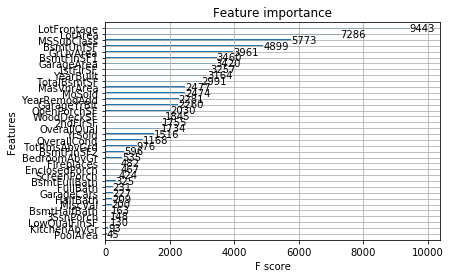

In [254]:
xgb.plot_importance(booster=model).plot

In [255]:
num_boost_round = 900

cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=100
)

cv_results

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,178715.765625,3143.381091,178591.921875,784.915422
1,161759.268750,3097.531327,161503.540625,708.368350
2,146672.540625,3135.630420,146106.278125,643.081997
3,133156.220313,3216.275599,132246.703125,576.201600
4,120955.509375,3177.471039,119729.067188,531.393114
5,110107.789063,3059.396923,108455.226562,473.530986
6,100585.512500,3134.229617,98302.195312,436.801471
7,91927.681250,3036.024910,89146.301563,373.887482
8,84297.659375,3116.758541,80885.193750,345.288194
9,77513.682812,3054.255818,73461.914062,316.973258


In [258]:
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': ypred })
output.to_csv('housing-predictions.csv', index = False)
print(output.head())
len(output)

     Id      SalePrice
0  1461  131045.226562
1  1462  157374.156250
2  1463  191025.062500
3  1464  186013.921875
4  1465  195094.453125


1459